In [1]:
import pandas as pd
import numpy as np
import os 
import sys
import matplotlib.pyplot as plt 

import sys, os
parent_dir = os.getcwd()
path = os.path.dirname(parent_dir)
sys.path.append(path)

In [31]:
ts = "221129-103613"

In [32]:
input_path = f"experiments/logs/Homer_SimpleEnv/rainbow/{ts}/"
device_pth = "/home/ds1/w210/home-energy-optimizer/"+"data/debug/device_list.csv"
devices = pd.read_csv(device_pth)["device_id"].tolist()
cols = [
    'device_id',
    'no_solar_cumulative_reward', 
    'no_battery_cumulative_reward',
    'sq_cumulative_reward',
    'cumulative_reward',
]
df_list = []
for device in devices:
    df = pd.read_csv("/home/ds1/w210/home-energy-optimizer/"
                +input_path+f"{device}_results_array.csv")
    df_list.append(df[cols].tail(1).copy())
combined_df = pd.concat(df_list)    

cols2=['no_solar_cumulative_reward','no_battery_cumulative_reward','sq_cumulative_reward','cumulative_reward']

combined_df[cols2].agg(['mean', 'std'])

,no_solar_cumulative_reward,no_battery_cumulative_reward,sq_cumulative_reward,cumulative_reward
mean,-44.270566,-14.475512,-1.654051,-12.231033
std,36.523427,26.872692,21.814259,26.279513


[Text(1, 0, 'no_solar_cumulative_reward'),
 Text(2, 0, 'no_battery_cumulative_reward'),
 Text(3, 0, 'sq_cumulative_reward'),
 Text(4, 0, 'cumulative_reward')]

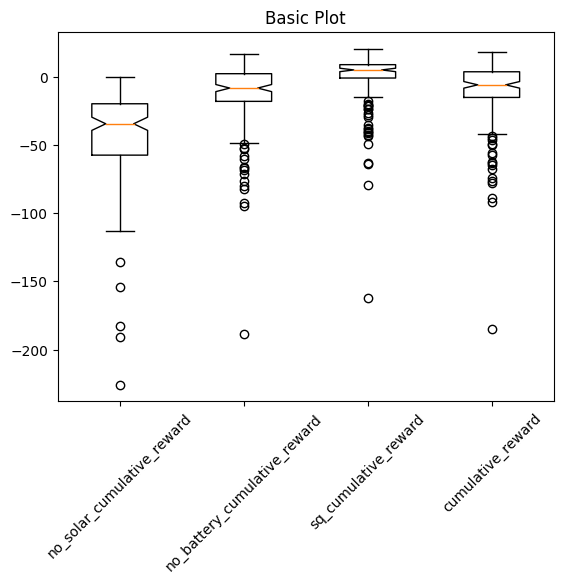

In [33]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(combined_df[cols2], notch = True)
ax1.set_xticklabels(labels=cols2, rotation = 45)

Text(0.5, 1.0, 'Net Gain by device')

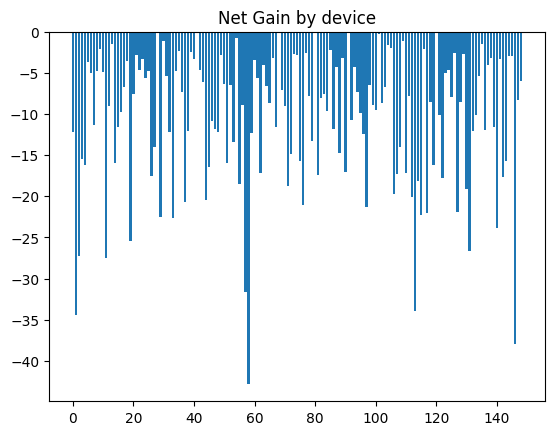

In [34]:
plt.bar(
    x=range(len(devices)), 
    height = combined_df['cumulative_reward'] - combined_df['sq_cumulative_reward']
)
plt.title('Net Gain by device')